## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [13]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### **Dataset Preparation**

In [2]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")

--2024-12-09 08:59:23--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 74.125.195.138, 74.125.195.101, 74.125.195.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download [following]
--2024-12-09 08:59:23--  https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.20.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [application/octet-stream]
Saving to: ‘Linear_regression_dataset’

Linear_regression_d 100%[===================>]   2.40M  --.-

In [4]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [5]:
for i in range(len(data_df['date'])):   # Remove T000000 part from data column. Hint: search about .str.replace() method. :)
  data_df.iat[i,1] = data_df.iat[i,1].replace("T000000","")
data_df['date']=np.int64(data_df['date'])
data_array = np.array(data_df.loc[:,"date":"sqft_lot15"] )                                           # Create a numpy array which does not have "id" field
assert (data_array.shape == (21613,20))

data_df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [6]:
mean = np.mean(data_array,axis=0)                                 # this should be an array, each entry should be mean of a column
sd = np.std(data_array,axis=0)                               # this should be an array, each entry should be standard deviation of a column
data_array_norm=np.empty(data_array.shape)
for i in range(data_array.shape[0]):
  data_array_norm[i,:]=(data_array[i,:] - mean)/sd

#data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)

(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [7]:
labels = data_df.price                                                                                                            # extract the price column from data

x_array_norm = np.delete(data_array_norm,1,axis=1)                                                                                                     # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [8]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  mse = np.mean(np.square(y_pred-y_true))                      # fill code here

  return mse

In [9]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.dot(x,a) + b                   # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [73]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)
  x=np.transpose(x)
  da = np.dot(x,yp-y_true)*2/m    # write code to calculate derivative of loss with respect to a
  db = 2*np.sum(yp-y_true)/m         # write code to calculate derivative of loss with respect to b

  assert(da.shape ==(n,))
  return (da,db)


In [69]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  (m,n) = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.random.uniform(0,1,(n,))                                       # initialize a- weights and b- bias
  b = 1

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b
    (da,db)=gradient(x,a,b,y_true)
    a = a - learning_rate * da
    b = b - learning_rate * db

    l_mse = loss(y(x,a,b),y_true)                               # calculate loss at this point
    loss_mse.append(l_mse)

    print("Epoch ",i+1," Completed!","loss = ",l_mse)

  print("Training completed!!")

  assert(a.shape==(n,))
  print(db.shape)
  return (loss_mse,a,b)


### **Training**

In [77]:
epochs = 1000            # tweak this!!!
learn_rate = 0.1        # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train,y_train,learn_rate,epochs)

Epoch  1  Completed! loss =  244359748264.51248
Epoch  2  Completed! loss =  168788875947.89954
Epoch  3  Completed! loss =  122147676073.78296
Epoch  4  Completed! loss =  92739654129.83493
Epoch  5  Completed! loss =  73986658610.59242
Epoch  6  Completed! loss =  61946402323.25488
Epoch  7  Completed! loss =  54178504173.55127
Epoch  8  Completed! loss =  49145522309.4369
Epoch  9  Completed! loss =  45869737021.32969
Epoch  10  Completed! loss =  43726173636.879524
Epoch  11  Completed! loss =  42314114452.59204
Epoch  12  Completed! loss =  41376084320.20209
Epoch  13  Completed! loss =  40746349072.99608
Epoch  14  Completed! loss =  40318032428.837715
Epoch  15  Completed! loss =  40022069419.508965
Epoch  16  Completed! loss =  39813715557.168274
Epoch  17  Completed! loss =  39663889992.29456
Epoch  18  Completed! loss =  39553615508.18172
Epoch  19  Completed! loss =  39470444278.1801
Epoch  20  Completed! loss =  39406157869.550865
Epoch  21  Completed! loss =  39355285476.8

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Epoch  1  Completed! loss =  427680884871.72473
Epoch  2  Completed! loss =  403103492230.633
Epoch  3  Completed! loss =  381285576644.217
Epoch  4  Completed! loss =  361770098586.02454
Epoch  5  Completed! loss =  344187371975.58887
Epoch  6  Completed! loss =  328237662914.03577
Epoch  7  Completed! loss =  313677298045.79504
Epoch  8  Completed! loss =  300307571718.8666
Epoch  9  Completed! loss =  287965885314.4737
Epoch  10  Completed! loss =  276518667044.15155
Epoch  11  Completed! loss =  265855712111.8514
Epoch  12  Completed! loss =  255885656146.99222
Epoch  13  Completed! loss =  246532353006.2389
Epoch  14  Completed! loss =  237731974425.2729
Epoch  15  Completed! loss =  229430685974.26422
Epoch  16  Completed! loss =  221582783242.65372
Epoch  17  Completed! loss =  214149195672.79187
Epoch  18  Completed! loss =  207096284191.36108
Epoch  19  Completed! loss =  200394873719.37747
Epoch  20  Completed! loss =  194019473546.6114
Epoch  21  Completed! loss =  187947648

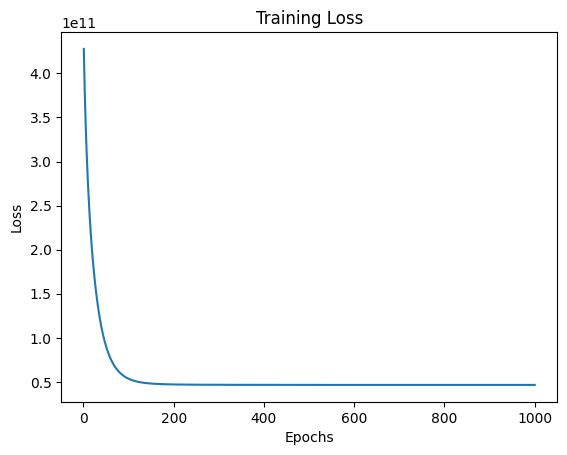

In [78]:
test_loss,a,b = gradient_descent(x_test,y_test,0.01,epochs)

print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot(range(1,epochs+1),test_loss)                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [29]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [56]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])


No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 7       9       7       0       1       

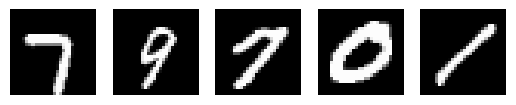

In [57]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [58]:
# Flatten the images into 1-d vectors

x_train_flatten = np.reshape(x_train,(-1,))                                       # flatten the images of training set
x_test_flatten = np.reshape(x_test,(-1,))                                        # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

#x_validation = x_train_flatten[:n_validation]
#y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
#y_train = y_train[n_validation:]
print(y_train.shape)

(60000,)


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [59]:

model = keras.models.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  # Dense layer 1 (256 neurons)
  layers.Dense(256, activation='sigmoid'),

  # Dense layer 2 (128 neurons)
  layers.Dense(128, activation='sigmoid'),

  # Output layer (10 classes)
  layers.Dense(10, activation='sigmoid'),
])
model.build()
# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<bound method Model.summary of <Sequential name=sequential_13, built=True>>

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [60]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

n_epochs = 10              # set number of epochs
batch_size = 16           # you can tweak with these parametrs
history = model.fit(x_train,y_train,epochs=n_epochs,batch_size=batch_size,validation_split=1/6)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8006 - loss: 0.7263 - val_accuracy: 0.8922 - val_loss: 0.3431
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8940 - loss: 0.3499 - val_accuracy: 0.9063 - val_loss: 0.2943
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9029 - loss: 0.3079 - val_accuracy: 0.9195 - val_loss: 0.2674
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9119 - loss: 0.2796 - val_accuracy: 0.9250 - val_loss: 0.2513
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9213 - loss: 0.2521 - val_accuracy: 0.9337 - val_loss: 0.2196
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9241 - loss: 0.2368 - val_accuracy: 0.9361 - val_loss: 0.2031
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9347 - loss: 0.2076 - val_accuracy: 0.9410 - val_loss: 0.1920
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9370 - loss: 0

### **Evaluate**
Evaluate your model on test data.

And Show some results

Loss =  0.16602112352848053
Accuracy =  94.87000107765198 %


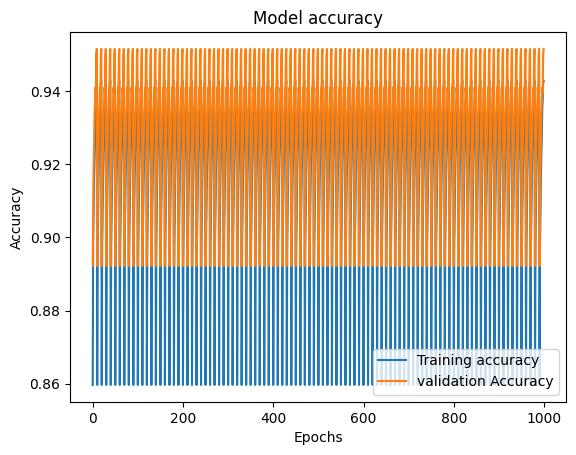

Ellipsis

In [61]:
results = model.evaluate(x_test, y_test, verbose=0)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy']*100, label="Training accuracy")
plt.plot(history.history['val_accuracy']*100, label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
...


Lets show our results on images from testing dataset

label: 
0       4       0       8       3       

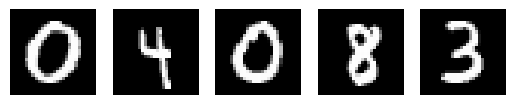

Predicted value: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
[[0.9997103  0.00113058 0.5794717  0.01197035 0.00271253 0.13464767
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[5.1591664e-06 1.1241079e-01 1.6577772e-03 3.5859889e-01 9.9537271e-01
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[9.9977517e-01 2.7438949e-03 9.7626001e-01 3.0207252e-02 2.7304559e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[3.2769442e-02 7.1863793e-03 5.7420254e-01 8.8036817e-01 6.1784772e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[1.34981601e-04 2.10566401e-01 6.49691939e-01 9.99543428e-01
  1.31952704e-03 6.18193805e-01 6.66831911e-05 4.90213791e-03
  1.41658604e-01 1.26256505e-02]]      

In [65]:
n = 5   # = no. of images to see predictions on

index = np.random.choice(x_test.shape[0],5)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind],cmap="gray")             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="       ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is hghest...

    digit = model.predict(x_test[ind].reshape(1,28,28))
    print(digit,end="      ")